In [77]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [78]:
dc = pd.read_csv("C://Users//Natalia//Desktop//ITMO//BioPython//ml_trees//dogs_n_cats.csv")

In [79]:
dc.head(10)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
5,26,31.2,1,0,0,собачка
6,20,24.0,1,1,0,собачка
7,23,27.6,1,1,0,собачка
8,21,25.2,1,1,0,собачка
9,28,33.6,1,1,0,собачка


In [80]:
dc.groupby("Вид").aggregate(["count"])

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
,count,count,count,count,count
Вид,,,,,
котик,500,500,500,500,500
собачка,500,500,500,500,500


In [81]:
#split dataset in features and target variable

feature_cols = ['Длина', 'Высота', 'Шерстист', 'Гавкает','Лазает по деревьям']
label = ['Вид']
x = dc[feature_cols] # Features
y = dc[label] # Target variable

In [82]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test
print(y_train.loc[y_train["Вид"] == "котик"].count())
print(y_train.loc[y_train["Вид"] == "собачка"].count())

Вид    396
dtype: int64
Вид    404
dtype: int64


In [83]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier(criterion='entropy', splitter='random')
clf2 = DecisionTreeClassifier(criterion='entropy')

In [84]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [85]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


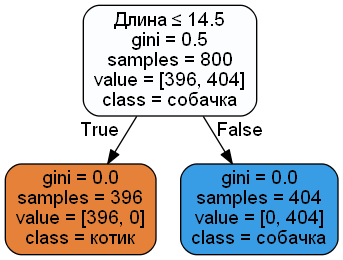

In [86]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['котик','собачка'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dc.png')
Image(graph.create_png())

In [87]:
dc.groupby("Вид").aggregate(["min", "mean", "max"])

Длина             Высота                Шерстист            Гавкает  \
          min    mean max    min     mean   max      min   mean max     min   
Вид                                                                           
котик       5   9.268  14    2.0   3.7072   5.6        0  0.938   1       0   
собачка    15  24.668  34   18.0  29.6016  40.8        0  0.990   1       0   

                   Лазает по деревьям             
          mean max                min   mean max  
Вид                                               
котик    0.032   1                  0  0.960   1  
собачка  0.898   1                  0  0.008   1

In [88]:
# Train Decision Tree Classifer1
clf1 = clf1.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(x_test)

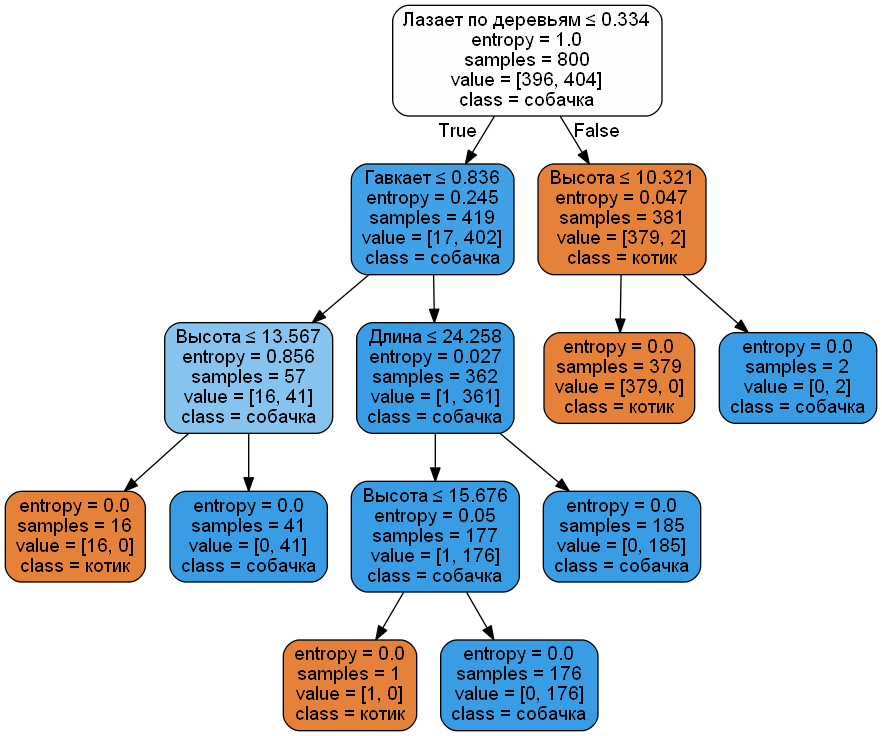

In [89]:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['котик','собачка'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dc.png')
Image(graph.create_png())

In [90]:
y_pred = clf1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [91]:
feature_cols = ['Шерстист', 'Гавкает','Лазает по деревьям']
x = dc[feature_cols] # Features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Train Decision Tree Classifer
clf2 = clf2.fit(x_train,y_train)

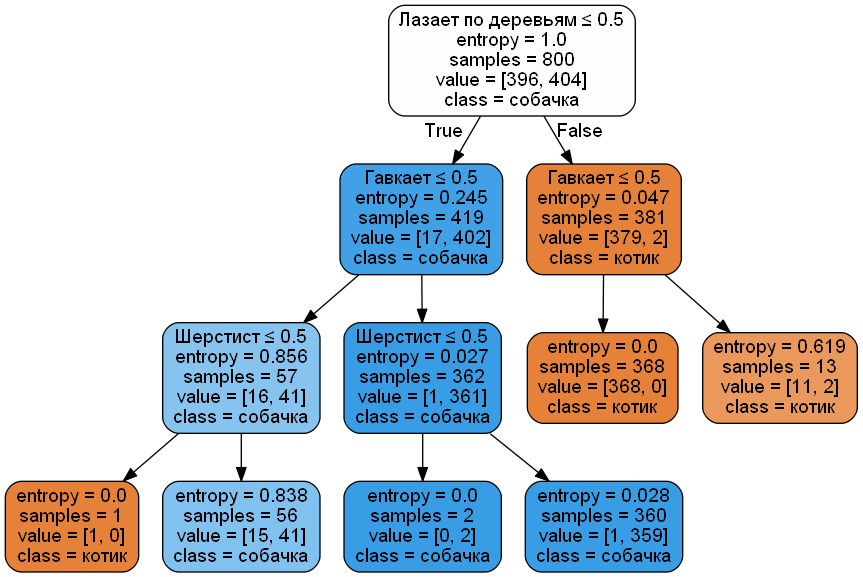

In [92]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['котик','собачка'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dc.png')
Image(graph.create_png())

In [93]:
y_pred = clf2.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.975


In [94]:
import json

In [95]:
with open('dataset_209691_15.json', 'r') as f:
    data = json.load(f)

In [96]:
df = pd.DataFrame(data)

In [97]:
df.head(10)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,34,40.8,1,1,0
10,23,27.6,1,1,0
11,23,27.6,1,1,0
12,20,24.0,1,0,0
13,19,22.8,1,1,0
14,23,27.6,1,1,0
15,20,24.0,1,1,0
16,29,34.8,1,1,0
17,21,25.2,1,0,0


In [98]:
df.describe()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.210000,15.388000,0.960000,0.480000,0.500000
std,8.723931,13.563165,0.196946,0.502117,0.502519
min,5.000000,2.000000,0.000000,0.000000,0.000000
25%,9.750000,3.900000,1.000000,0.000000,0.000000
50%,14.000000,5.600000,1.000000,0.000000,0.500000
75%,23.000000,27.600000,1.000000,1.000000,1.000000
max,34.000000,40.800000,1.000000,1.000000,1.000000


In [99]:
y = clf.predict(df)

df0 = df.copy()
df0["Вид"] = y
df0.groupby("Вид").aggregate(["count"])

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
,count,count,count,count,count
Вид,,,,,
котик,54,54,54,54,54
собачка,46,46,46,46,46


In [101]:
df0

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,25,30.0,1,1,0,собачка
1,34,40.8,1,1,0,собачка
10,23,27.6,1,1,0,собачка
11,23,27.6,1,1,0,собачка
12,20,24.0,1,0,0,собачка
13,19,22.8,1,1,0,собачка
14,23,27.6,1,1,0,собачка
15,20,24.0,1,1,0,собачка
16,29,34.8,1,1,0,собачка
17,21,25.2,1,0,0,собачка


In [102]:
y1 = clf1.predict(df)

df1 = df.copy()
df1["Вид"] = y1
df1.groupby("Вид").aggregate(["count"])

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
,count,count,count,count,count
Вид,,,,,
котик,54,54,54,54,54
собачка,46,46,46,46,46


In [103]:
df1

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,25,30.0,1,1,0,собачка
1,34,40.8,1,1,0,собачка
10,23,27.6,1,1,0,собачка
11,23,27.6,1,1,0,собачка
12,20,24.0,1,0,0,собачка
13,19,22.8,1,1,0,собачка
14,23,27.6,1,1,0,собачка
15,20,24.0,1,1,0,собачка
16,29,34.8,1,1,0,собачка
17,21,25.2,1,0,0,собачка


In [104]:
y2 = clf2.predict(df[['Шерстист', 'Гавкает','Лазает по деревьям']])

df2 = df.copy()
df2["Вид"] = y2
df2.groupby("Вид").aggregate(["count"])

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
,count,count,count,count,count
Вид,,,,,
котик,50,50,50,50,50
собачка,50,50,50,50,50


In [105]:
df2

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,25,30.0,1,1,0,собачка
1,34,40.8,1,1,0,собачка
10,23,27.6,1,1,0,собачка
11,23,27.6,1,1,0,собачка
12,20,24.0,1,0,0,собачка
13,19,22.8,1,1,0,собачка
14,23,27.6,1,1,0,собачка
15,20,24.0,1,1,0,собачка
16,29,34.8,1,1,0,собачка
17,21,25.2,1,0,0,собачка
